# Homework03:  Topic Modeling with Latent Semantic Analysis

Latent Semantic Analysis (LSA) is a method for finding latent similarities between documents treated as a bag of words by using a low rank approximation. It is used for document classification, clustering and retrieval. For example, LSA can be used to search for prior art given a new patent application. In this homework, we will implement a small library for simple latent semantic analysis as a practical example of the application of SVD. The ideas are very similar to PCA. SVD is also used in recommender systems in an similar fashion (for an SVD-based recommender system library, see [Surpise](http://surpriselib.com). 

We will implement a toy example of LSA to get familiar with the ideas. If you want to use LSA or similar methods for statistical language analysis, the most efficient Python libraries are probably [gensim](https://radimrehurek.com/gensim/) and [spaCy](https://spacy.io) - these also provide an online algorithm - i.e. the training information can be continuously updated. Other useful functions for processing natural language can be found in the [Natural Language Toolkit](http://www.nltk.org/).

**Note**: The SVD from scipy.linalg performs a full decomposition, which is inefficient since we only need to decompose until we get the first k singluar values. If the SVD from `scipy.linalg` is too slow, please use the `sparsesvd` function from the [sparsesvd](https://pypi.python.org/pypi/sparsesvd/) package to perform SVD instead.  You can install in the usual way with 
```
!pip install sparsesvd
```

Then import the following
```python
from sparsesvd import sparsesvd 
from scipy.sparse import csc_matrix 
```

and use as follows
```python
sparsesvd(csc_matrix(M), k=10)
```

**Exercise 1 (20 points)**.  Calculating pairwise distance matrices.

Suppose we want to construct a distance matrix between the rows of a matrix. For example, given the matrix 

```python
M = np.array([[1,2,3],[4,5,6]])
```

the distance matrix using Euclidean distance as the measure would be
```python
[[ 0.000  1.414  2.828]
 [ 1.414  0.000  1.414]
 [ 2.828  1.414  0.000]] 
```
if $M$ was a collection of column vectors.

Write a function to calculate the pairwise-distance matrix given the matrix $M$ and some arbitrary distance function. Your functions should have the following signature:
```
def func_name(M, distance_func):
    pass
```

0. Write a distance function for the Euclidean, squared Euclidean and cosine measures.
1. Write the function using looping for M as a collection of row vectors.
2. Write the function using looping for M as a collection of column vectors.
3. Wrtie the function using broadcasting for M as a collection of row vectors.
4. Write the function using broadcasting for M as a collection of column vectors. 

For 3 and 4, try to avoid using transposition (but if you get stuck, there will be no penalty for using transposition). Check that all four functions give the same result when applied to the given matrix $M$.

0

In [22]:
import scipy.linalg as la
import numpy as np

In [23]:
def distance_euclidiean(x, y):
    """calc euc distance: sqrt sum of the difference between 2 vectors"""
    return np.sqrt(np.sum((x-y)**2))

In [24]:
def distance_euclidieanSquared(x, y):
    """calc euc squared distance: sum of the difference between 2 vectors"""
    return np.sum((x-y)**2)

In [25]:
def distance_cosine(x, y):
    """calc cosine distance: 1 - uv/|u||v|"""
    return 1 - x @ y / la.norm(x) / la.norm(y)

In [156]:
# if need all measures in one function
def distance(x, y, distance_func):
    """calc distance given custom distance measures"""
    return distance_func(x, y)

In [225]:
M = np.array([[1,2,3],[4,5,6]])

# loops

1

In [29]:
def dist_row_loop(M, distance_func):
    """calculating distance matrix trying m as row vectors"""
    rows = M.shape[0]
    table = np.zeros((rows, rows), dtype='float')
    for i in range(rows):
        for j in range(rows):
            table[i, j] = distance_func(M[i, :], M[j, :])   
    return table

dist_row_loop(M, distance_func=distance_euclidiean)

array([[0.        , 5.19615242],
       [5.19615242, 0.        ]])

2

In [30]:
def dist_col_loop(M, distance_func):
    """calculating distance matrix trying m as col vectors"""
    cols = M.shape[1]
    table = np.zeros((cols, cols), dtype='float')
    for i in range(cols):
        for j in range(cols):
            table[i, j] = distance_func(M[:, i], M[:, j])   
    return table

dist_col_loop(M, distance_func=distance_euclidiean)

array([[0.        , 1.41421356, 2.82842712],
       [1.41421356, 0.        , 1.41421356],
       [2.82842712, 1.41421356, 0.        ]])

# broadcasting

3

In [234]:
#rewrite the earlier funcs in more generic forms

# def distance_euclidiean(x, y):
#     """calc euc distance: sqrt sum of the difference between 2 vectors"""
#     return np.sqrt(np.sum((x-y)**2, axis = -1))

# def distance_euclidieanSquared(x, y):
#     """calc euc squared distance: sum of the difference between 2 vectors"""
#     return np.sum((x-y)**2, axis = -1)

# def dist_row_broadcast(M, distance_func):
#     """calculating distance matrix trying m as row vectors"""
#     x = M[:, None]
#     y = M[None, :]
#     table = distance_func(x, y)
#     return table

# dist_row_broadcast(M, distance_func=distance_euclidiean)

In [32]:
def dist_row_broadcast(M, distance_func):
    """calculating distance matrix trying m as row vectors"""
    if distance_func=="distance_euclidiean":
        table = np.sqrt(np.sum((M[:, None] - M[None, :])**2, axis = -1))
    elif distance_func=="distance_euclidieanSquared":
        table = np.sum((M[:, None] - M[None, :])**2, axis = -1)
    elif distance_func=="distance_cosine": 
        table = 1
    return table

dist_row_broadcast(M, distance_func="distance_euclidiean")

array([[0.        , 5.19615242],
       [5.19615242, 0.        ]])

4

In [33]:
def dist_col_broadcast(M, distance_func):
    """calculating distance matrix trying m as row vectors"""
    if distance_func=="distance_euclidiean":
        table = np.sqrt(np.sum((M[:, None,:] - M[:,:,None])**2, axis = 0))
    elif distance_func=="distance_euclidieanSquared":
        table = np.sum((M[:, None,:] - M[:,:,None])**2, axis = 0)
    elif distance_func=="distance_cosine": 
        table = 1
    return table

dist_col_broadcast(M, distance_func="distance_euclidiean")

array([[0.        , 1.41421356, 2.82842712],
       [1.41421356, 0.        , 1.41421356],
       [2.82842712, 1.41421356, 0.        ]])

**Exercise 2 (20 points)**. 

**Exercise 2 (20 points)**. Write 3 functions to calculate the term frequency (tf), the inverse document frequency (idf) and the product (tf-idf). Each function should take a single argument `docs`, which is a dictionary of (key=identifier, value=document text) pairs, and return an appropriately sized array. Convert '-' to ' ' (space), remove punctuation, convert text to lowercase and split on whitespace to generate a collection of terms from the document text.

- tf = the number of occurrences of term $i$ in document $j$
- idf = $\log \frac{n}{1 + \text{df}_i}$ where $n$ is the total number of documents and $\text{df}_i$ is the number of documents in which term $i$ occurs.

Print the table of tf-idf values for the following document collection

```
s1 = "The quick brown fox"
s2 = "Brown fox jumps over the jumps jumps jumps"
s3 = "The the the lazy dog elephant."
s4 = "The the the the the dog peacock lion tiger elephant"

docs = {'s1': s1, 's2': s2, 's3': s3, 's4': s4}
```

In [34]:
import string
from collections import Counter
def processTxt(txt):
    return txt.lower().replace('-',' ').translate(str.maketrans("","",string.punctuation)).split(" ")

In [160]:
s1 = "The quick brown fox"
s2 = "Brown fox jumps over the jumps jumps jumps"
s3 = "The the the lazy dog elephant."
s4 = "The the the the the dog peacock lion tiger elephant"
docs = {'s1': s1, 's2': s2, 's3': s3, 's4': s4}

In [203]:
def tf(doc):
    """calc term freq"""
    sentLst = list(doc.values())
    doc_words = [processTxt(content) for content in sentLst]
    vocab = sorted(list(set([word for words in doc_words for word in words])))
    table = np.zeros((len(vocab), len(sentLst)), dtype='int')
    for i, word in enumerate(vocab):
        for j, doc in enumerate(doc_words):
            table[i, j] = doc.count(word)
    return table #pd.DataFrame(table, index=vocab, columns=docs.keys())
tf(docs)

array([[1, 1, 0, 0],
       [0, 0, 1, 1],
       [0, 0, 1, 1],
       [1, 1, 0, 0],
       [0, 4, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 1],
       [0, 1, 0, 0],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [1, 1, 3, 5],
       [0, 0, 0, 1]])

In [204]:
def idf(doc):
    """calc inverse document freq"""
    sentLst = list(doc.values())
    doc_words = [processTxt(content) for content in sentLst]
    vocab = sorted(list(set([word for words in doc_words for word in words])))
    table = np.zeros((len(vocab), 1), dtype='float')
    for i, word in enumerate(vocab):
        df = sum([word in doc for doc in doc_words])
        table[i] = np.log(len(sentLst)/(1 + df))
    return table #pd.DataFrame(table, index=vocab)
idf(docs)

array([[ 0.28768207],
       [ 0.28768207],
       [ 0.28768207],
       [ 0.28768207],
       [ 0.69314718],
       [ 0.69314718],
       [ 0.69314718],
       [ 0.69314718],
       [ 0.69314718],
       [ 0.69314718],
       [-0.22314355],
       [ 0.69314718]])

In [206]:
def tfidf(docs):
    """calc tf-idf. this result will differ from sklearn's tf-idf vectorizer due to different logic"""
    sentLst = list(docs.values())
    doc_words = [processTxt(content) for content in sentLst]
    vocab = sorted(list(set([word for words in doc_words for word in words])))
    return pd.DataFrame(tf(docs) * idf(docs), index=vocab, columns=docs.keys())

In [207]:
tfidf(docs)

,s1,s2,s3,s4
brown,0.287682,0.287682,0.000000,0.000000
dog,0.000000,0.000000,0.287682,0.287682
elephant,0.000000,0.000000,0.287682,0.287682
fox,0.287682,0.287682,0.000000,0.000000
jumps,0.000000,2.772589,0.000000,0.000000
lazy,0.000000,0.000000,0.693147,0.000000
lion,0.000000,0.000000,0.000000,0.693147
over,0.000000,0.693147,0.000000,0.000000
peacock,0.000000,0.000000,0.000000,0.693147
quick,0.693147,0.000000,0.000000,0.000000


**Exercise 3 (20 points)**. 

1. Write a function that takes a matrix $M$ and an integer $k$ as arguments, and reconstructs a reduced matrix using only the $k$ largest singular values. Use the `scipy.linagl.svd` function to perform the decomposition. This is the least squares approximation to the matrix $M$ in $k$ dimensions.

2. Apply the function you just wrote to the following term-frequency matrix for a set of $9$ documents using $k=2$ and print the reconstructed matrix $M'$.
```
M = np.array([[1, 0, 0, 1, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 0, 0, 0, 0, 0],
       [1, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 1, 0, 1, 0, 0, 0, 0],
       [0, 1, 1, 2, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 1, 1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1, 1, 1, 0],
       [0, 0, 0, 0, 0, 0, 1, 1, 1],
       [0, 0, 0, 0, 0, 0, 0, 1, 1]])
```

3. Calculate the pairwise correlation matrix for the original matrix M and the reconstructed matrix using $k=2$ singular values (you may use [scipy.stats.spearmanr](http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html) to do the calculations). Consider the fist 5 sets of documents as one group $G1$ and the last 4 as another group $G2$ (i.e. first 5 and last 4 columns). What is the average within group correlation for $G1$, $G2$ and the average cross-group correlation for G1-G2 using either $M$ or $M'$. (Do not include self-correlation in the within-group calculations.).

1

In [39]:
import numpy.linalg as la

def svdk(M, k):
    """perform full svd decomposition and then take first k features"""
    U, s, V = np.linalg.svd(M)
    reducedMatrix = U[:, :k] @ np.diag(s[:k]) @ V[:k, :]
    return reducedMatrix

2

In [235]:
M = np.array([[1, 0, 0, 1, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 0, 0, 0, 0, 0],
       [1, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 1, 0, 1, 0, 0, 0, 0],
       [0, 1, 1, 2, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 1, 1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1, 1, 1, 0],
       [0, 0, 0, 0, 0, 0, 1, 1, 1],
       [0, 0, 0, 0, 0, 0, 0, 1, 1]])
reducedM = svdk(M, 2)
reducedM

array([[ 0.16205797,  0.40049828,  0.37895454,  0.46756626,  0.17595367,
        -0.05265495, -0.11514284, -0.15910198, -0.09183827],
       [ 0.14058529,  0.36980077,  0.32899603,  0.40042722,  0.16497247,
        -0.03281545, -0.07056857, -0.09676827, -0.04298073],
       [ 0.15244948,  0.50500444,  0.35793658,  0.41010678,  0.23623173,
         0.02421652,  0.05978051,  0.0868573 ,  0.12396632],
       [ 0.25804933,  0.84112343,  0.60571995,  0.69735717,  0.39231795,
         0.03311801,  0.08324491,  0.12177239,  0.18737973],
       [ 0.44878975,  1.23436483,  1.0508615 ,  1.26579559,  0.55633139,
        -0.07378998, -0.15469383, -0.20959816, -0.04887954],
       [ 0.15955428,  0.5816819 ,  0.37521897,  0.41689768,  0.27654052,
         0.05590374,  0.1322185 ,  0.18891146,  0.21690761],
       [ 0.15955428,  0.5816819 ,  0.37521897,  0.41689768,  0.27654052,
         0.05590374,  0.1322185 ,  0.18891146,  0.21690761],
       [ 0.21846278,  0.54958058,  0.51096047,  0.62805802,  0

3

In [41]:
G1 = M[:,:4]
G2 = M[:,4:]

Within group correlation

In [42]:
from scipy.stats import spearmanr
np.mean(spearmanr(G1))

0.40060518014819646

In [43]:
np.mean(spearmanr(G2))

0.2706084043264429

Cross group correlation

In [44]:
np.mean(spearmanr(G1, G2))

0.18691666316271546

In [45]:
np.mean(spearmanr(reducedM[:,:4], reducedM[:,4:]))

0.08479286680664984

**Exercise 4 (40 points)**. Clustering with LSA

1. Begin by loading a PubMed database of selected article titles using 'pickle'. With the following:
```import pickle
docs = pickle.load(open('data/pubmed.pic', 'rb'))```

    Create a tf-idf matrix for every term that appears at least once in any of the documents. What is the shape of the tf-idf matrix? 

2. Perform SVD on the tf-idf matrix to obtain $U \Sigma V^T$ (often written as $T \Sigma D^T$ in this context with $T$ representing the terms and $D$ representing the documents). If we set all but the top $k$ singular values to 0, the reconstructed matrix is essentially $U_k \Sigma_k V_k^T$, where $U_k$ is $m \times k$, $\Sigma_k$ is $k \times k$ and $V_k^T$ is $k \times n$. Terms in this reduced space are represented by $U_k \Sigma_k$ and documents by $\Sigma_k V^T_k$. Reconstruct the matrix using the first $k=10$ singular values.

3. Use agglomerative hierarchical clustering with complete linkage to plot a dendrogram and comment on the likely number of  document clusters with $k = 100$. Use the dendrogram function from [SciPy ](https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.cluster.hierarchy.dendrogram.html).

4. Determine how similar each of the original documents is to the new document `data/mystery.txt`. Since $A = U \Sigma V^T$, we also have $V = A^T U S^{-1}$ using orthogonality and the rule for transposing matrix products. This suggests that in order to map the new document to the same concept space, first find the tf-idf vector $v$ for the new document - this must contain all (and only) the terms present in the existing tf-idx matrix. Then the query vector $q$ is given by $v^T U_k \Sigma_k^{-1}$. Find the 10 documents most similar to the new document and the 10 most dissimilar. 

1

In [237]:
import pickle
docs = pickle.load(open('data/pubmed.pic', 'rb'))

In [238]:
import pandas as pd
df_docs = pd.DataFrame(docs.items(), columns=['Title', 'Txt'])

In [239]:
#create tf-idf matrix where rows are terms and cols are docs
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
tfidf = TfidfVectorizer()
mat_tfidf = tfidf.fit_transform(df_docs['Txt']).T
mat_tfidf.shape

(6167, 178)

In [82]:
medText = tfidf(docs)
medText.head().f

,Phenotypic profiling of CD8 + T cells during Plasmodium vivax blood-stage infection.,Addition of histamine to subcutaneously injected Plasmodium berghei sporozoites increases the parasite liver load and could facilitate whole-parasite vaccination.,Genome-wide association study of clinically defined gout identifies multiple risk loci and its association with clinical subtypes.,The Avian Transcriptome Response to Malaria Infection.,Efficacy and Safety of Saxagliptin as Add-On Therapy in Type 2 Diabetes.,The influence of organophosphate and carbamate on sperm chromatin and reproductive hormones among pesticide sprayers.,CD40 Is Required for Protective Immunity against Liver Stage Plasmodium Infection.,Airport malaria: report of four cases in Tunisia.,Antiprotozoal Activity and DNA Binding of Dicationic Acridones.,Distinct Helix Propensities and Membrane Interactions of Human and Rat IAPP Monomers in Anionic Lipid Bilayers.,...,Correlation between osteocalcin positive endothelial progenitor cells and spotty calcification in patients with coronary artery disease.,Safety and effect on reported symptoms of depigmented-polymerised allergen immunotherapy: a retrospective study of 2927 paediatric patients.,Evaluating the toxic and beneficial effects of lichen extracts in normal and diabetic rats.,In Vitro Induction of Human Adipose-Derived Stem Cells into Lymphatic Endothelial-Like Cells.,SMS photograph-based external quality assessment of reading and interpretation of malaria rapid diagnostic tests in the Democratic Republic of the Congo.,IL-18 is associated with protection against rhinovirus-induced colds and asthma exacerbations.,Molecular basis of carcinogenesis in diabetic patients (Review).,"Lineage-related cytotoxicity and clonogenic profile of 1,4-benzoquinone-exposed hematopoietic stem and progenitor cells.",Prodrugs of reverse fosmidomycin analogs.,"Update: malaria, U.S. Armed Forces, 2014."
,13.297706,0.0,0.0,0.0,1.0229,0.0,2.045801,0.0,0.0,0.0,...,1.0229,0.0,0.0,0.0,1.022900,0.0,0.0,0.0,0.0,0.0
kenya,0.000000,0.0,0.0,0.0,0.0000,0.0,0.000000,0.0,0.0,0.0,...,0.0000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
maldi,0.000000,0.0,0.0,0.0,0.0000,0.0,0.000000,0.0,0.0,0.0,...,0.0000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
t414were,0.000000,0.0,0.0,0.0,0.0000,0.0,0.000000,0.0,0.0,0.0,...,0.0000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
displaying,0.000000,0.0,0.0,0.0,0.0000,0.0,0.000000,0.0,0.0,0.0,...,0.0000,0.0,0.0,0.0,4.488636,0.0,0.0,0.0,0.0,0.0


In [83]:
medText.shape

(6638, 178)

2

In [97]:
from sparsesvd import sparsesvd 
from scipy.sparse import csc_matrix 

Tk,sk, Dk=sparsesvd(csc_matrix(medText), k=10)
# reconstructed matrix
m10 = Tk.T @ np.diag(sk) @ Dk
m10

array([[ 1.27648023e+01,  6.51189873e-01,  9.49578326e-01, ...,
         4.43347212e-01,  6.92495354e-01,  5.44485865e-01],
       [ 3.93079832e-02,  5.93037843e-02,  4.44241987e-02, ...,
         4.55333972e-02,  1.72704036e-02,  2.37849973e-02],
       [-2.06229743e-02,  7.37880150e-04, -1.63174889e-02, ...,
        -8.09781617e-02,  4.66314138e-03, -2.91871079e-03],
       ...,
       [ 1.08024827e-01,  4.59991994e-02,  2.76902469e-02, ...,
         7.59897130e-02,  1.85144898e-02,  1.34614715e-02],
       [-3.34133188e-02,  2.82053559e-01,  1.85537129e-01, ...,
         2.61074833e-01,  1.00406738e-01,  9.94860221e-02],
       [-2.80816637e-02,  5.28251816e-02,  3.71296657e-02, ...,
         8.56254860e-02,  1.95040264e-02,  1.80187401e-02]])

3

In [98]:
Tk100,sk100, Dk100=sparsesvd(csc_matrix(medText), k=100)
# reconstructed matrix
m100 = Tk100.T @ np.diag(sk100) @ Dk100
m100

array([[ 1.32908644e+01, -2.93565068e-01,  7.09886012e-03, ...,
        -2.65883228e-02,  4.97594807e-01,  3.11161156e-01],
       [-1.13917736e-02, -7.09096442e-02, -5.04970766e-02, ...,
        -1.31019499e-02,  1.38866887e-02, -2.61669131e-02],
       [-1.31468600e-03, -1.02412853e-02, -7.75273839e-04, ...,
         3.24834528e-04, -3.40056928e-03, -3.11616700e-03],
       ...,
       [-1.61203393e-02, -1.04530009e-01, -2.25479838e-02, ...,
         1.08315735e-02,  2.59808059e-02,  5.27925371e-02],
       [-3.52878121e-02,  3.17196476e-02,  1.50690517e-01, ...,
        -2.14174529e-02,  1.21655226e-01,  3.02761520e-01],
       [ 3.72935219e-03, -2.59103741e-02,  1.98988777e-03, ...,
        -4.67775559e-03,  8.66598882e-02,  1.74157326e-03]])

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

Z = linkage(m100, method="complete")
dendrogram(Z) 
pass

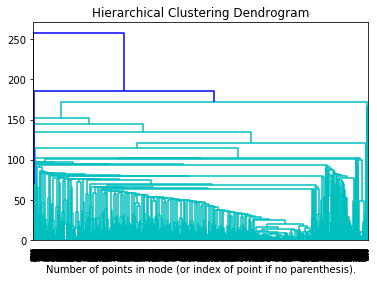

In [243]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
import numpy as np

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    sch.dendrogram(linkage_matrix, **kwargs)
    
from sklearn.datasets import load_iris
iris = load_iris()
X = m100

# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(X)
plt.title('Hierarchical Clustering Dendrogram')
plt.figure(figsize(12,5))
plot_dendrogram(model, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()


The likely number of document clusters are 3

4

In [53]:
with open('data/mystery.txt') as f:
    file=f.read()

In [151]:
docs1={'newTxt': file}
newTfIdf = tfidf(docs1)

In [95]:
# this must contain all (and only) the terms present in the existing tf-idx matrix
newTfIdf2 = pd.merge(medText.reset_index().iloc[:,0], newTfIdf.reset_index(),how='left').fillna(0)
newTfIdf2.head()

,index,newTxt
0,,-164.969029
1,kenya,0.000000
2,maldi,0.000000
3,t414were,0.000000
4,displaying,0.000000


In [100]:
print(Tk100.shape,sk100.shape, Dk100.shape, newTfIdf2.shape)

(100, 6638) (100,) (100, 178) (6638, 2)


In [110]:
q_hat = Tk100@newTfIdf2.iloc[:,1].to_numpy()[:, None]
q_hat.shape

(100, 1)

In [142]:
similarity=[]
for i in range(100):
    similarity.append(((np.diag(sk100) @ Dk100[:,i])@q_hat/la.norm(np.diag(sk100) @ Dk100[:,i])/la.norm(q_hat))[0])

10 most similar

In [149]:
np.argsort(similarity)[-10:]

array([93,  1,  3, 14, 44, 99, 40, 56, 88, 24])

10 most dissimilar

In [148]:
np.argsort(similarity)[:10]

array([60, 90, 73, 68,  6, 64, 38, 48, 21, 13])

$v^T U_k \Sigma_k^{-1}$

In [250]:
v=newTfIdf2.iloc[:,1].to_numpy()[:, None]
uk=Tk100
v.shape
#la.inv(np.diag(sk100)).shape

(6638, 1)

In [252]:
(v.T@uk).shape

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 100 is different from 6638)

**Notes on the Pubmed articles**

These were downloaded with the following script.

```python
from Bio import Entrez, Medline
Entrez.email = "YOUR EMAIL HERE"
import cPickle

try:
    docs = cPickle.load(open('pubmed.pic'))
except Exception, e:
    print e

    docs = {}
    for term in ['plasmodium', 'diabetes', 'asthma', 'cytometry']:
        handle = Entrez.esearch(db="pubmed", term=term, retmax=50)
        result = Entrez.read(handle)
        handle.close()
        idlist = result["IdList"]
        handle2 = Entrez.efetch(db="pubmed", id=idlist, rettype="medline", retmode="text")
        result2 = Medline.parse(handle2)
        for record in result2:
            title = record.get("TI", None)
            abstract = record.get("AB", None)
            if title is None or abstract is None:
                continue
            docs[title] = '\n'.join([title, abstract])
            print title
        handle2.close()
    cPickle.dump(docs, open('pubmed.pic', 'w'))
docs.values()
```